In [38]:
#importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#Reading the dataset
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop(["Id"],axis=1).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

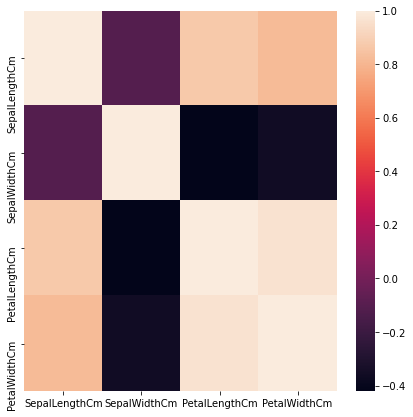

In [4]:
#Finding the correlation between the numerical variables using a heatmap
plt.figure(figsize=(7,7))
sns.heatmap(df.drop(["Id"],axis=1).corr())

Inference- All the numerical variables either have a high positive correlation, or they have a negative correlation between them. Sepal length has high correlation with petal length and petal width and a negative correlation with petal width.Sepal width has a negative correlation with the 3 other factors.Petal length and petal width has a high positive correlation

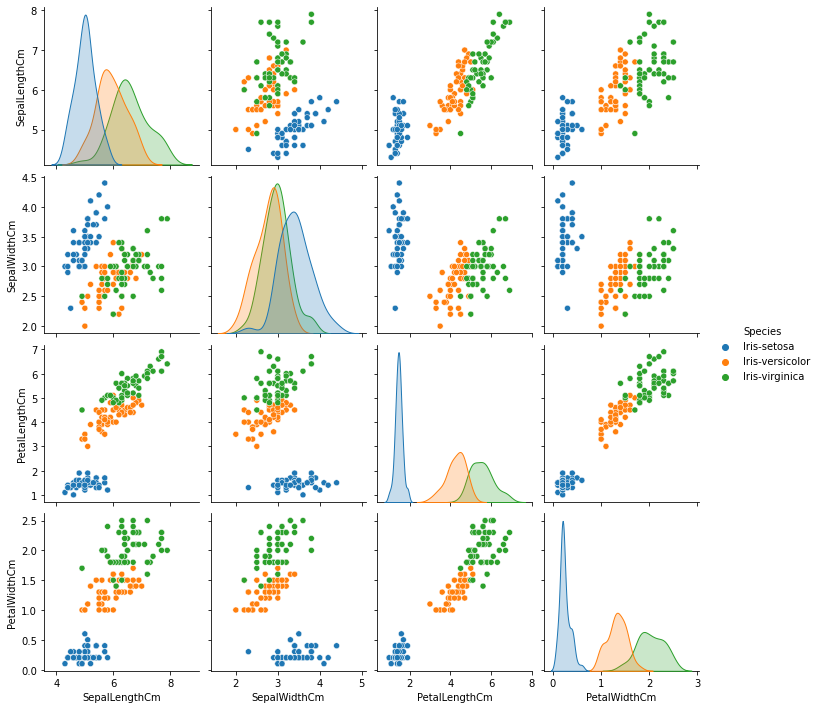

In [6]:
#Showing the pairplot between different numerical variables
sns.pairplot(df.drop(["Id"],axis=1),hue="Species")

In [35]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

We have 50 instances of each, hence our dataset is balanced

In [34]:
X=df.iloc[:,1:5].values

# KMeansClustering

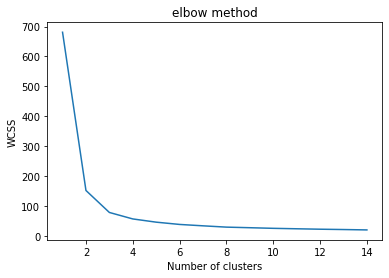

In [12]:
#Finding the optimal number of clusters using the elbow method. The metric used is within cluster sum of squares.
#WCSS is the sum of squared distance between each point and the centroid in a cluster
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.title("elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [21]:
#training the model with the number of clusters-3
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=42)
y_means=kmeans.fit_predict(normalize(X))
y_means

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
#mapping the predicted cluster number to their suitable categories
y_means=pd.DataFrame(y_means).iloc[:,0].map({0:"Iris-setosa",1:"Iris-versicolor",2:"Iris-virginica"})

In [23]:
y_means

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: 0, Length: 150, dtype: object

In [49]:
#confusion matrix
confusion_matrix(df["Species"],y_means,labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  0, 50]], dtype=int64)

The model correctly predicted the 50 instances of 0-Iris-setosa and 2-Iris-virginica clusters and 45 instances of 1-Iris-versicolor cluster. But it misclassified 5 instances of Iris-versicolor cluster, and instead predicted them as Iris-virginica cluster. 

In [40]:
#accuracy
accuracy_score(df.Species,y_means)

0.9666666666666667

Our model has an accuracy score of 96.6% 

In [41]:
df["KMeans_Predicted"]=y_means

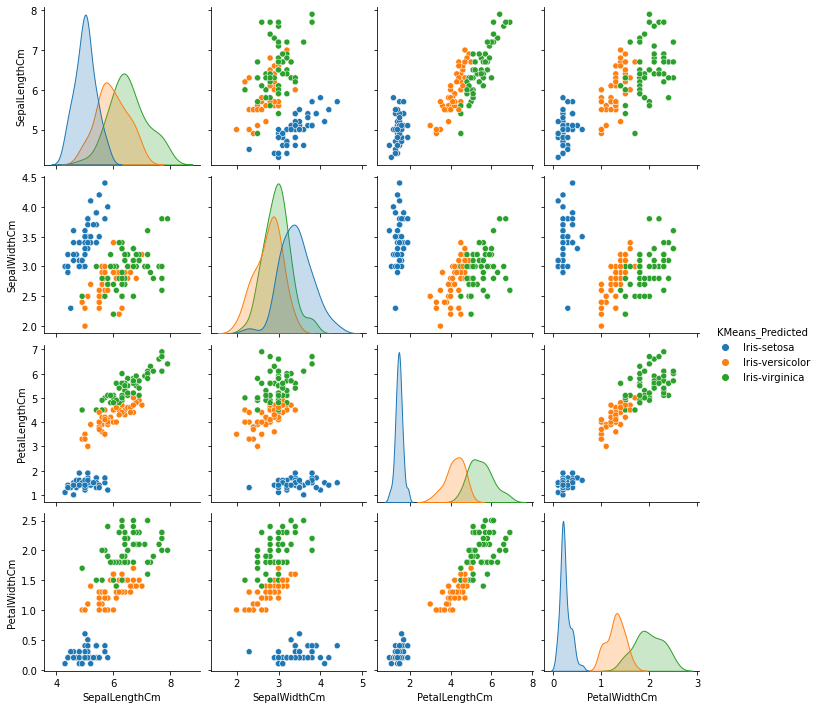

In [43]:
#plotting the distribution with the predicted categories
sns.pairplot(df.drop(["Id"],axis=1),hue="KMeans_Predicted")

# Hierarchal Clustering

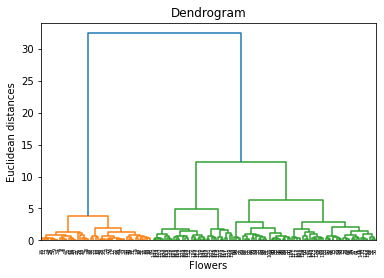

In [44]:
#Creating a dendrogram
#ward is the average of sum of squares of distances between all possible combinations betwwen 2 clusters
from scipy.cluster import hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method="ward")) 
plt.title("Dendrogram")
plt.xlabel("Flowers")
plt.ylabel("Euclidean distances")
plt.show()

In [45]:
#We are using Agglomerative Clustering.Here we at first consider each point as a cluster and then we create clusters until we reach an optimal number of clusters
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y_hc=hc.fit_predict(normalize(X))
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [46]:
y_hc=pd.DataFrame(y_hc).iloc[:,0].map({1:"Iris-setosa",0:"Iris-versicolor",2:"Iris-virginica"})

In [50]:
confusion_matrix(df["Species"],y_hc,labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  4, 46]], dtype=int64)

The model correctly predicted 50 instances of Iris-setosa,48 instances of Iris-versicolor and 46 instances of Iris-virginica.
It misclassified 2 instances of Iris-versicolor,as those of Iris-virginica, and 4 instances of Iris-virginica, as those of Iris-versicolor

In [54]:
#accuracy
accuracy_score(df.Species,y_hc)

0.96

In [51]:
df["HC_Predicted"]=y_hc

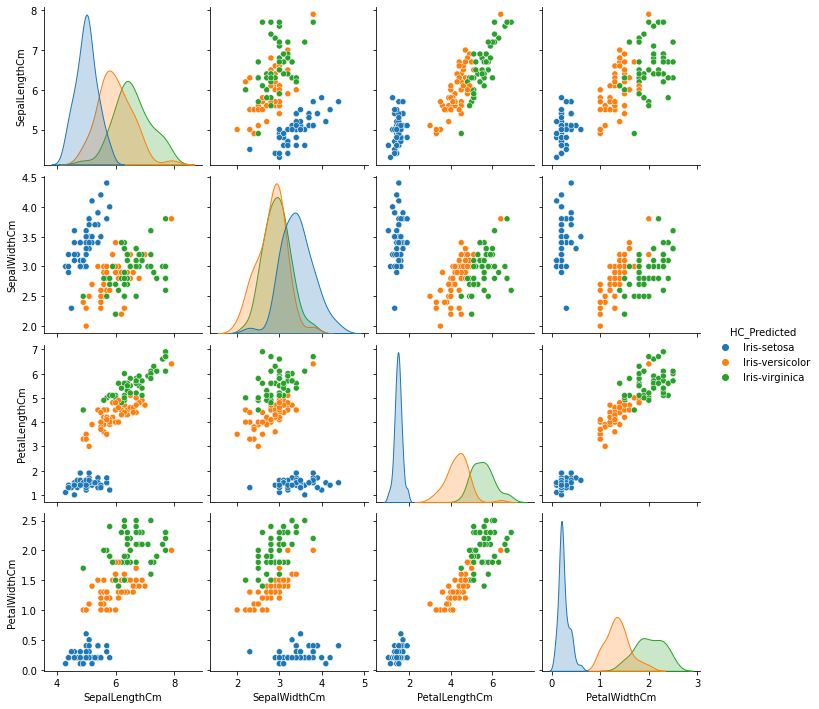

In [53]:
sns.pairplot(df.drop(["Id"],axis=1),hue="HC_Predicted")